In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier
from joblib import dump
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    f1_score,
    recall_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

In [87]:
df = pd.read_csv('../data/feature_engineered/feature_engineered_food_delivery_data.csv')
print(df.head(2))

   Distance_km  Weather  Traffic_Level  Vehicle_Type  Preparation_Time_min  \
0         7.93      1.0            0.0           1.0                    12   
1        16.42      0.0            1.0           2.0                    20   

   Courier_Experience_yrs  Delivery_Time_min  Time_of_Day_Afternoon  \
0                     1.0                 43                    1.0   
1                     2.0                 84                    0.0   

   Time_of_Day_Evening  Time_of_Day_Morning  Time_of_Day_Night  Base_Time  \
0                  0.0                  0.0                0.0      35.79   
1                  1.0                  0.0                0.0      69.26   

   Expected_Time_min  Is_Late  
0           38.58162        1  
1           79.78752        1  


In [88]:
X = df.drop(columns=['Is_Late'])
Y = df['Is_Late']

In [89]:
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, random_state=42, test_size=0.2)

In [90]:
model = XGBClassifier(
    random_state=42, 
    n_estimators=500, 
    learning_rate=0.01,
    gamma=0.7, # For model generalization as we have 500 rotations.
    max_depth=8,
    colsample_bytree=0.9,
    subsample=0.8,
    early_stopping_rounds=20
)


In [91]:
model.fit(
    xTrain,       
    yTrain,
    eval_set=[(xTest, yTest)],
    verbose=0
)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.9
,device,None
,early_stopping_rounds,20
,enable_categorical,False
,eval_metric,None


In [92]:
yPred = model.predict(xTest)

In [93]:
prec = precision_score(yTest, yPred)
acc = accuracy_score(yTest, yPred)
f1 = f1_score(yTest, yPred)
rec = recall_score(yTest, yPred)
roc_auc = roc_auc_score(yTest, yPred)
cm = confusion_matrix(yTest, yPred)

In [94]:

print(f'Precision: {prec}\nAccuracy: {acc}\nF1 Score: {f1}\nRecall: {rec}\nROC AUC: {roc_auc}')

Precision: 0.9587628865979382
Accuracy: 0.945
F1 Score: 0.9441624365482234
Recall: 0.93
ROC AUC: 0.945


In [95]:
model_report = classification_report(yTest, yPred)
print(model_report)

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       100
           1       0.96      0.93      0.94       100

    accuracy                           0.94       200
   macro avg       0.95      0.95      0.94       200
weighted avg       0.95      0.94      0.94       200



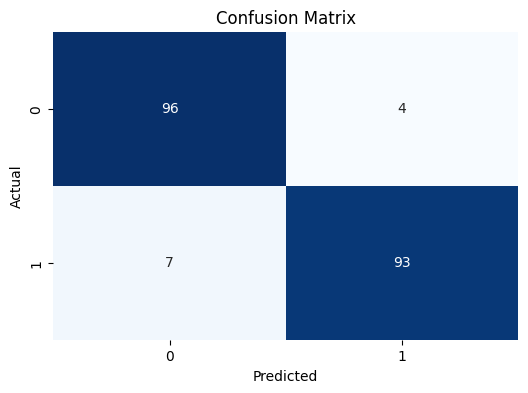

In [96]:
cm = confusion_matrix(yTest, yPred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [97]:
dump(model, '../models/xgb_classifier_model.joblib')

['../models/xgb_classifier_model.joblib']